In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pandas import Series

import category_encoders as ce
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
vg2 = 'C:/Users/Kevona Jean/Desktop/DS4 Notebooks/datasets/vgsales-12-4-2019-short.csv'
vg2= pd.read_csv(vg2)
vg2.head().T

,0,1,2,3,4
Rank,1,2,3,4,5
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,PlayerUnknown's Battlegrounds,Wii Sports Resort
Genre,Sports,Platform,Racing,Shooter,Sports
ESRB_Rating,E,NaN,E,NaN,E
Platform,Wii,NES,Wii,PC,Wii
Publisher,Nintendo,Nintendo,Nintendo,PUBG Corporation,Nintendo
Developer,Nintendo EAD,Nintendo EAD,Nintendo EAD,PUBG Corporation,Nintendo EAD
Critic_Score,7.7,10,8.2,NaN,8
User_Score,NaN,NaN,9.1,NaN,8.8
Total_Shipped,82.86,40.24,37.14,36.6,33.09


In [3]:
vg2.describe(include = 'all')

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,55792,55792,23623,55792,55792,55775,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
unique,NaN,37102,20,8,74,3069,8064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Plants vs. Zombies,Misc,E,PC,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20,9476,10811,10978,4891,4756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27896.500000,NaN,NaN,NaN,NaN,NaN,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,NaN,NaN,NaN,NaN,NaN,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000


Get rid of nulls and extraneous columns

In [4]:
vg= vg2[['Name','Platform','Genre','Publisher','Developer','Year',
               'Critic_Score','ESRB_Rating','Global_Sales']]
vg= vg.dropna().reset_index(drop=True)

In [5]:
vg.head()

,Name,Platform,Genre,Publisher,Developer,Year,Critic_Score,ESRB_Rating,Global_Sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013.0,9.4,M,20.32
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014.0,9.7,M,19.39
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,2002.0,9.6,M,16.15
3,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,2011.0,8.7,M,14.82
4,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,2010.0,8.8,M,14.74


In [6]:
vg.describe(include = 'all')

,Name,Platform,Genre,Publisher,Developer,Year,Critic_Score,ESRB_Rating,Global_Sales
count,4170,4170,4170,4170,4170,4170.000000,4170.000000,4170,4170.000000
unique,2938,26,20,206,1043,NaN,NaN,5,NaN
top,Madden NFL 07,X360,Action,Electronic Arts,EA Canada,NaN,NaN,T,NaN
freq,9,588,739,333,98,NaN,NaN,1404,NaN
mean,NaN,NaN,NaN,NaN,NaN,2007.183453,7.150048,NaN,0.767067
std,NaN,NaN,NaN,NaN,NaN,4.690177,1.422944,NaN,1.394742
min,NaN,NaN,NaN,NaN,NaN,1993.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2004.000000,6.400000,NaN,0.120000
50%,NaN,NaN,NaN,NaN,NaN,2008.000000,7.400000,NaN,0.320000
75%,NaN,NaN,NaN,NaN,NaN,2010.000000,8.200000,NaN,0.790000


VALUE COUNTS

By ESRB Rating

Text(0.5, 0, '')

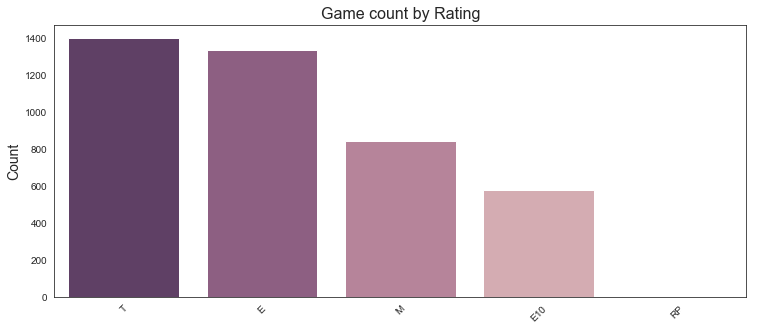

In [7]:
RChart = vg[['Name', 'ESRB_Rating']].groupby(['ESRB_Rating']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style('white')
plt.figure(figsize = (12.4, 5))
plt.xticks(rotation=45)
sns.barplot(x = 'ESRB_Rating', y='Name', data= RChart[:5],palette=sns.cubehelix_palette((5), dark=0.3, light=.85,reverse=True)).set_title(('Game count by Rating'), fontsize=16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('')

By Genre

Text(0.5, 0, '')

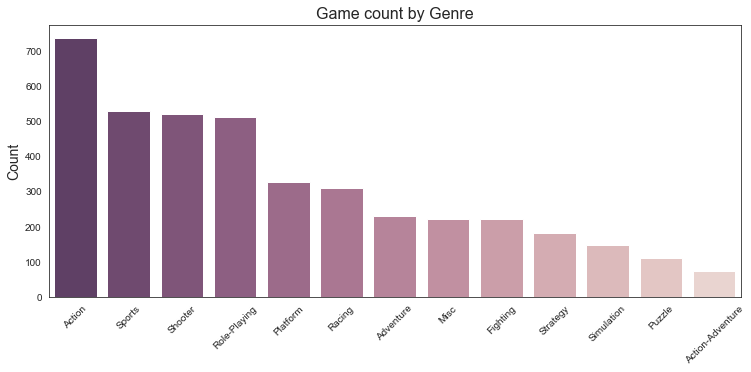

In [8]:
GChart = vg[['Name', 'Genre']].groupby(['Genre']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style('white')
plt.figure(figsize = (12.4, 5))
plt.xticks(rotation=45)
sns.barplot(x = 'Genre', y='Name', data= GChart[:13],palette=sns.cubehelix_palette((13), dark=0.3, light=.85,reverse=True)).set_title(('Game count by Genre'), fontsize=16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('')

By Platform

Text(0.5, 0, '')

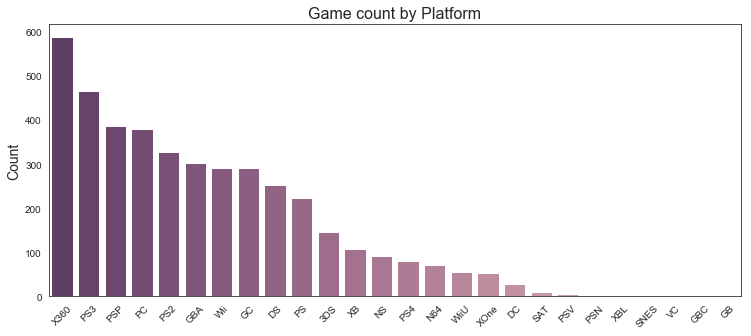

In [9]:
Platform_count = vg[['Name', 'Platform']].groupby(['Platform']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style('white')
plt.figure(figsize = (12.4, 5))
plt.xticks(rotation=45)
sns.barplot(x = 'Platform', y='Name', data= Platform_count[:30],
            palette=sns.cubehelix_palette((30), 
            dark=0.3, light=.85,reverse=True)).set_title(('Game count by Platform'), 
            fontsize=16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('')

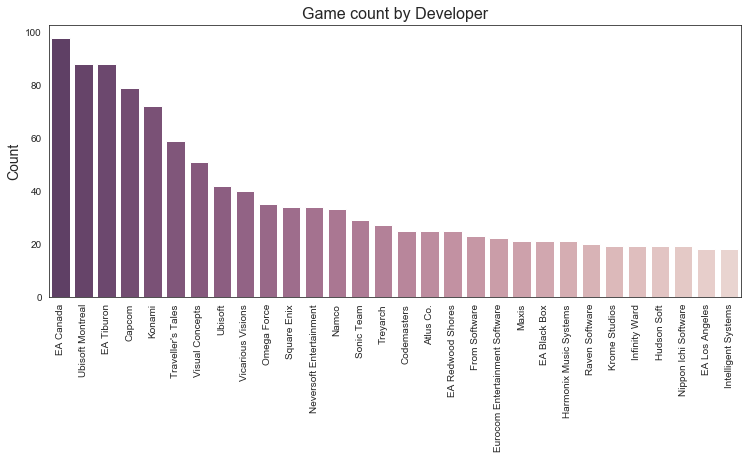

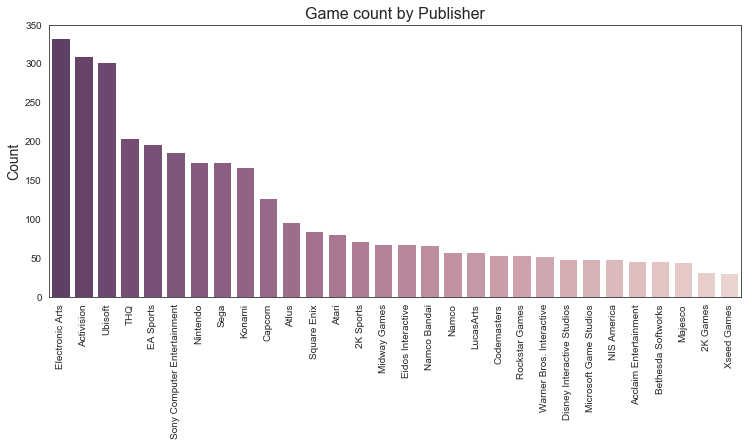

In [10]:
cols = ['Developer', 'Publisher']

for col in cols:
    chart = vg[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

Engineer Best Seller Feature

In [11]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0
vg['Best_Seller'] = vg['Global_Sales'].apply(lambda x: hit(x))

In [12]:
vg= vg.drop(columns= 'Global_Sales')

In [13]:
vg.dtypes

Name             object
Platform         object
Genre            object
Publisher        object
Developer        object
Year            float64
Critic_Score    float64
ESRB_Rating      object
Best_Seller       int64
dtype: object

In [14]:
vg.head()

,Name,Platform,Genre,Publisher,Developer,Year,Critic_Score,ESRB_Rating,Best_Seller
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013.0,9.4,M,1
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014.0,9.7,M,1
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,2002.0,9.6,M,1
3,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,2011.0,8.7,M,1
4,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,2010.0,8.8,M,1


TRAIN/VAL/TEST SPLIT

In [15]:
test = vg[vg['Year'] >= 2018]
vg1= vg[vg['Year'] < 2018]
val = vg1[vg1['Year'] >= 2013]
train = vg[vg['Year'] < 2013]

In [16]:
print(vg1.shape)

(4067, 9)


In [17]:
print(test.shape)
print(val.shape)
print(train.shape)

(103, 9)
(320, 9)
(3747, 9)


In [18]:
target = 'Best_Seller'


# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 1000].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [19]:
X_train= train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [20]:
X_test = test[features]
y_test = test[target]

In [21]:
X_train.head()

,Year,Critic_Score,Platform,Genre,Publisher,Developer,ESRB_Rating
2,2002.0,9.6,PS2,Action,Rockstar Games,Rockstar North,M
3,2011.0,8.7,X360,Shooter,Activision,Infinity Ward,M
4,2010.0,8.8,X360,Shooter,Activision,Treyarch,M
6,2009.0,9.5,X360,Shooter,Activision,Infinity Ward,M
8,2011.0,8.8,PS3,Shooter,Activision,Infinity Ward,M


In [22]:
X_test.shape

(103, 7)

In [23]:
y_test.shape

(103,)

In [24]:
X_val.shape

(320, 7)

In [25]:
y_train.shape

(3747,)

In [26]:
y_val.shape

(320,)

In [27]:
vg.head()

,Name,Platform,Genre,Publisher,Developer,Year,Critic_Score,ESRB_Rating,Best_Seller
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013.0,9.4,M,1
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014.0,9.7,M,1
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,2002.0,9.6,M,1
3,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,2011.0,8.7,M,1
4,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,2010.0,8.8,M,1


Modeling

fit the model on all features

In [28]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),  
   RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))


# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.score(X_val, y_val)
print('Validation Accuracy', y_pred)

Validation Accuracy 0.778125


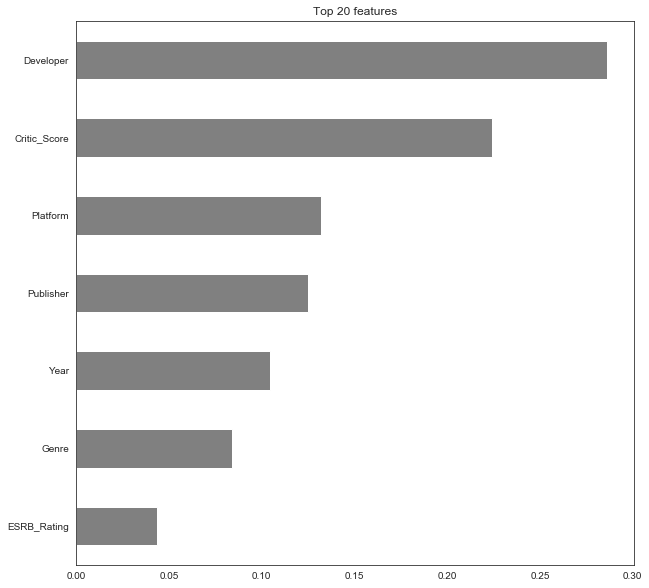

In [30]:
# Get feature importances
encoder = pipeline.named_steps['ordinalencoder']
rf = pipeline.named_steps['randomforestclassifier']
feature_names = encoder.transform(X_val).columns
importances = pd.Series(rf.feature_importances_, feature_names)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

Refit model using only Critic_Score

In [31]:
pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),  
   RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))


# Fit on train, score on val
pipeline2.fit(X_train['Critic_Score'], y_train)
y_pred2 = pipeline2.score(X_val['Critic_Score'], y_val)
print('Validation Accuracy', y_pred2)

Validation Accuracy 0.675


In [35]:
proba = pipeline.predict_proba(X_val)

In [37]:
val['proba'] = proba

ValueError: Wrong number of items passed 2, placement implies 1

In [ ]:
test[(test['Platform']=='NS')
    & (test['Best_Seller'] != test['proba'])].count()/len(test['proba'])*100

Confusion MAtrix